# Battle of the Cities: Data Visualization
### Goals:

* __bar chart of rent prices by neighborhood for each city__
* __find median rent for 2018 and 2018 per neighborhood per city__
* is rent price above national average? (folium)
* is rent prive above city average? (folium)

* label neighborhoods: Affordable, Average, Expensive within city and within country
    * ex: National Rank = Expensive, City Rank = Affordable
* box plots

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import json
import folium
from folium import plugins

In [27]:
rent_data = pd.read_csv('rent_data_clean.csv', index_col = 0)
rent_data.head(2)

,City,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Upper West Side,New York,4395.0,4300.0,4354.0,4531.0,4632.0,4606.0,4471.0,4288.0,4157.0,...,4166.0,4256.0,4214.0,4148.0,4109.0,4086.0,4071.0,4061.0,4030.0,4053.0
Upper East Side,New York,4606.0,4384.0,4401.0,4622.0,4823.0,4744.0,4546.0,4367.0,4236.0,...,4254.0,4361.0,4341.0,4240.0,4141.0,4038.0,3944.0,3905.0,3899.0,3941.0


First I want to find the median rent price for each neighborhood since January 2018. I'll use this data to compare rent prices among neighborhoods and see the distribution of rent prices for each city.

In [33]:
for row in rent_data.iterrows():
    rent_data["Median_Rent"] = rent_data.median(axis=1)

In [35]:
nyc_data = rent_data[rent_data["City"] == "New York"]
sf_data = rent_data[rent_data["City"] == "San Francisco"]

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


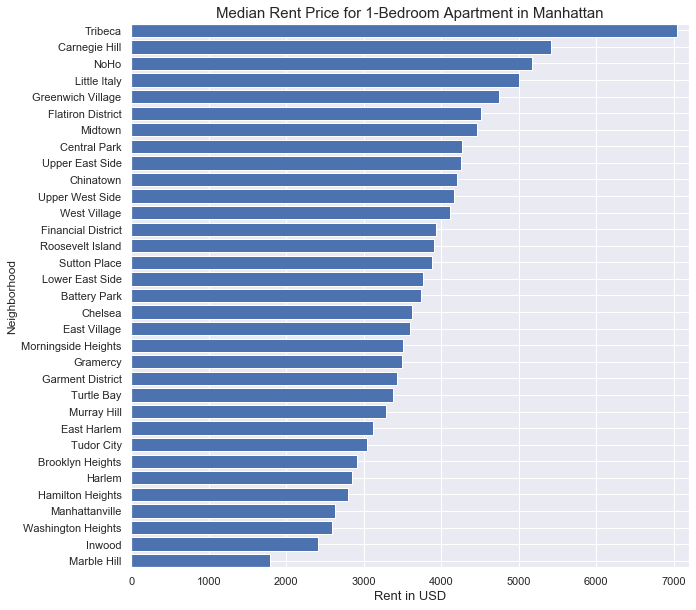

In [102]:
nyc_data.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 10))

plt.barh(nyc_data.index, nyc_data.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in Manhattan", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,7200)
plt.ylabel("Neighborhood", size=12)

plt.show()

C:\Users\deand\Anaconda3\envs\default\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


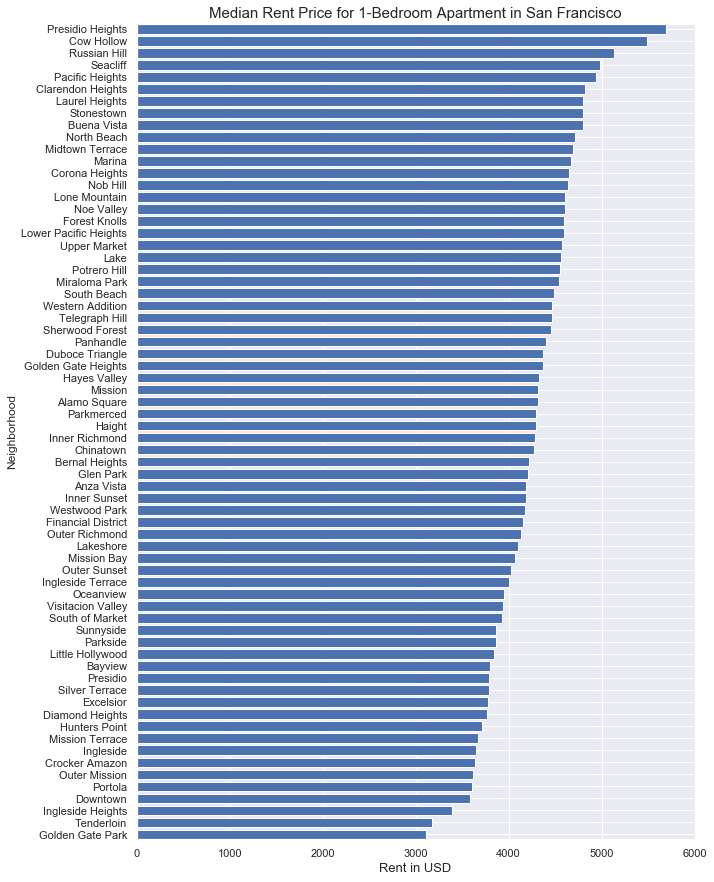

In [105]:
sf_data.sort_values('Median_Rent', ascending=True, inplace=True)

fig = plt.figure(figsize=(10, 15))

plt.barh(sf_data.index, sf_data.Median_Rent)
plt.margins(0.20, 0)
plt.title("Median Rent Price for 1-Bedroom Apartment in San Francisco", size=15)
plt.xlabel("Rent in USD", size=13)
plt.xlim(0,6000)
plt.ylabel("Neighborhood", size=12)

plt.show()